# KMeans "predict the optimum number of clusters"

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import seaborn as sns
sns.set()

In [47]:
iris = sns.load_dataset("iris")

##print(iris)
#iris_data = pd.DataFrame(iris.data,columns= iris.feature_names)
print(iris_data.columns)
ab=iris_data['sepal length (cm)'].values
print(ab[0:7])
iris["species"].nunique()
print(iris.info())

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
[5.1 4.9 4.7 4.6 5.  5.4 4.6]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [20]:
normalize_iris = iris_data.iloc[:,[0,1,2,3]].values

In [21]:
w_c_s_s=[]
for i in range(1,17):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',
                    max_iter=350,n_init=15,random_state=2)
    kmeans.fit(normalize_iris)
    w_c_s_s.append(kmeans.inertia_)

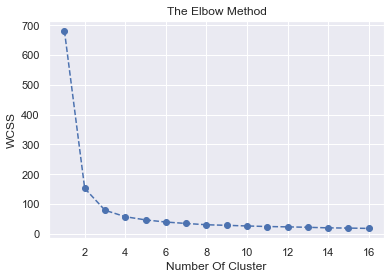

In [22]:
plt.plot(range(1,17),w_c_s_s,linestyle = "--",marker = "o")
plt.title("The Elbow Method")
plt.xlabel("Number Of Cluster")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',
                    max_iter=350,n_init=10,random_state=0)

# Fitting The Data and Visualize it in 3 Clusters

In [24]:
y_kmeans = kmeans.fit_predict(normalize_iris)

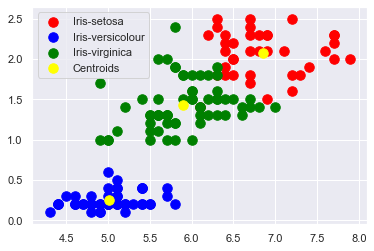

In [25]:
# Visualising the clusters - On column 0 and 3
plt.scatter(normalize_iris[y_kmeans == 0, 0], normalize_iris[y_kmeans == 0, 3], 
            s = 90, c = 'red', label = 'Iris-setosa')
plt.scatter(normalize_iris[y_kmeans == 1, 0], normalize_iris[y_kmeans == 1, 3], 
            s = 90, c = 'blue', label = 'Iris-versicolour')
plt.scatter(normalize_iris[y_kmeans == 2, 0], normalize_iris[y_kmeans == 2, 3],
            s = 90, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters on column 0 and 3
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], 
            s = 90, c = 'yellow', label = 'Centroids')

ab=plt.legend(loc="upper left")